#### IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

###  Load the dataset

In [2]:
df = pd.read_csv("/content/india_housing_prices.csv")

In [3]:
# Display basic info
print("\n=== Dataset Information ===")
print(df.info())
print("\n=== First 5 Rows ===")
print(df.head())

# Data Preprocessing
print("\n=== Data Preprocessing ===")

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Fill missing values with median for numerical columns
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode all categorical variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Identify numeric columns for correlation
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Prepare features and target
X = df.drop(['Price_in_Lakhs'], axis=1)
y = df['Price_in_Lakhs']

# Exploratory Data Analysis (EDA)
print("\n=== Exploratory Data Analysis ===")



=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19246 entries, 0 to 19245
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              19246 non-null  int64  
 1   State                           19246 non-null  object 
 2   City                            19246 non-null  object 
 3   Locality                        19246 non-null  object 
 4   Property_Type                   19246 non-null  object 
 5   BHK                             19246 non-null  int64  
 6   Size_in_SqFt                    19246 non-null  int64  
 7   Price_in_Lakhs                  19246 non-null  float64
 8   Price_per_SqFt                  19246 non-null  float64
 9   Year_Built                      19246 non-null  int64  
 10  Furnished_Status                19246 non-null  object 
 11  Floor_No                        19246 non-null  int64  
 12  Tot

### Plot distribution of housing prices

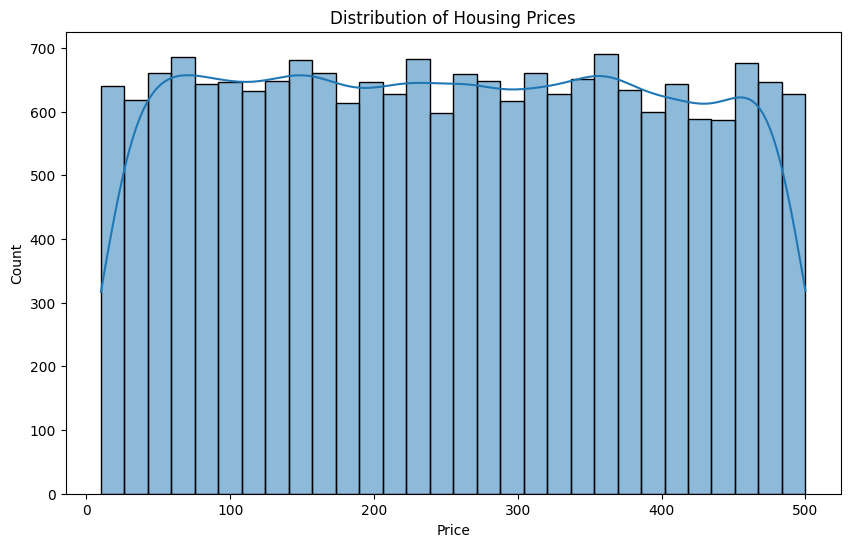

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_in_Lakhs'], kde=True, bins=30)
plt.title("Distribution of Housing Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

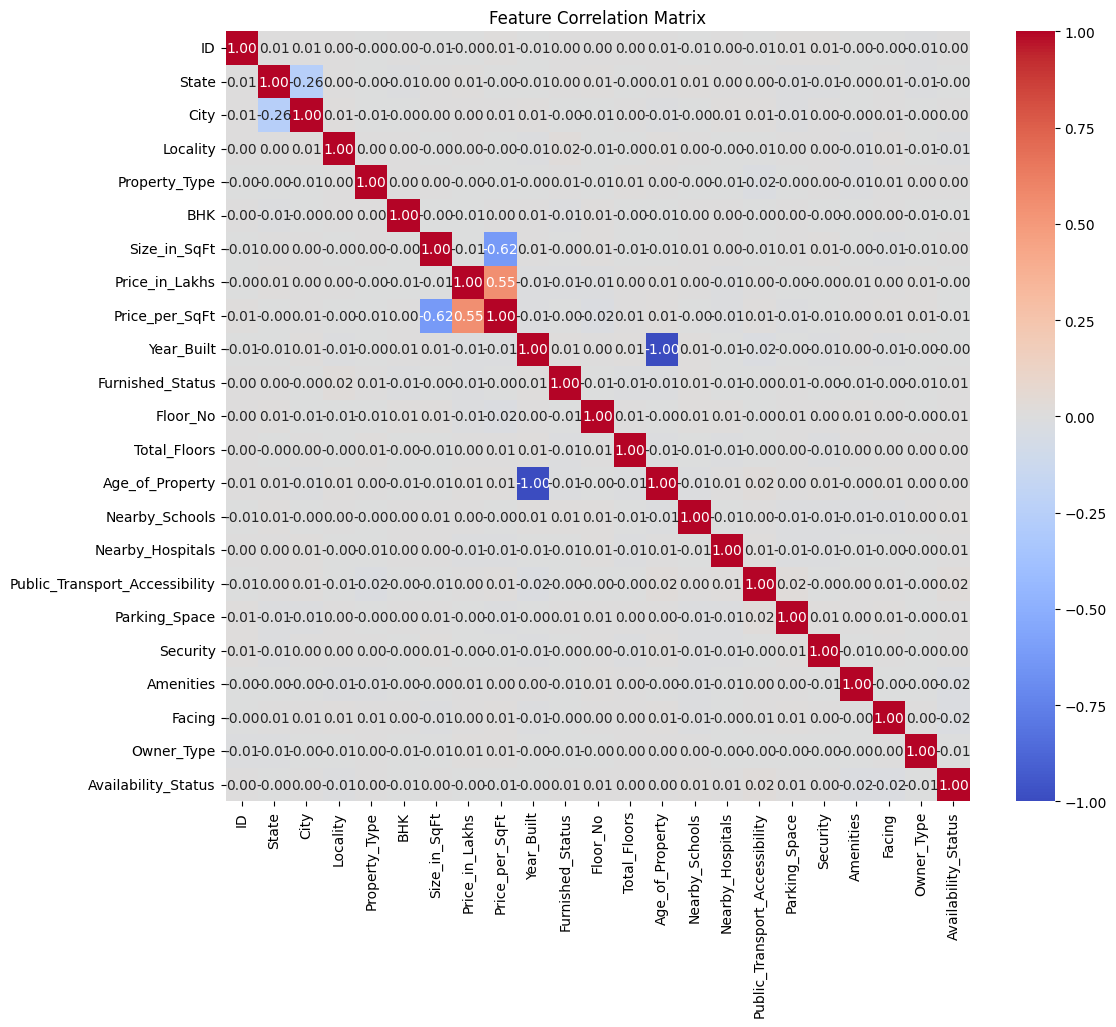

In [5]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Example: Relationship between Bedrooms and Price
if 'Bedrooms' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Bedrooms', y='Price', data=df)
    plt.title("Price by Number of Bedrooms")
    plt.xlabel("Bedrooms")
    plt.ylabel("Price")
    plt.show()

####MODEL BUILDING

In [6]:
print("\n=== Model Building ===")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train Random Forest Regressor
model = RandomForestRegressor(n_estimators=20, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\n=== Model Evaluation ===")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)




=== Model Building ===

=== Model Evaluation ===
Mean Squared Error: 93.59
R² Score: 1.00

Feature Importance:
                           Feature  Importance
7                   Price_per_SqFt    0.811218
6                     Size_in_SqFt    0.184997
3                         Locality    0.000383
0                               ID    0.000369
18                       Amenities    0.000352
2                             City    0.000301
11                    Total_Floors    0.000301
10                        Floor_No    0.000296
1                            State    0.000266
14                Nearby_Hospitals    0.000216
13                  Nearby_Schools    0.000209
8                       Year_Built    0.000172
12                 Age_of_Property    0.000157
5                              BHK    0.000145
19                          Facing    0.000116
20                      Owner_Type    0.000089
4                    Property_Type    0.000086
9                 Furnished_Status    0.00

### FEATURE IMPORTANCE

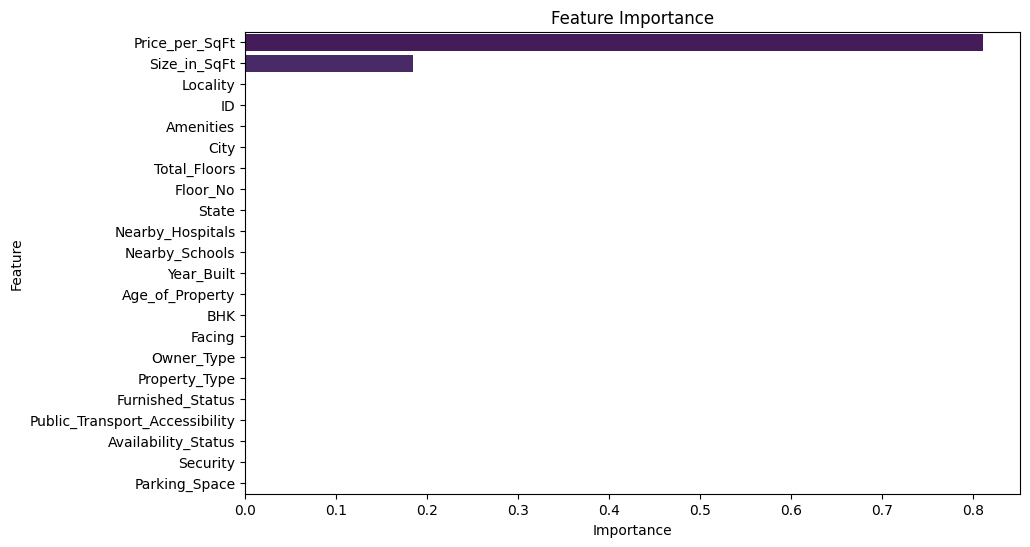

In [7]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature',hue='Feature', data=feature_importance, palette='viridis')
plt.title("Feature Importance")
plt.show()